In [1]:
#!gsutil ls
#!gsutil cp -r "gs://ba820-project/Yelp JSON" data
#!tar -xvf data/'Yelp JSON'/yelp_dataset.tar
#!pip install pyarrow

In [2]:
# Ignore the below. Code to convert json to parquet. Do not rerun code.
#path = 'yelp_academic_dataset_business.json'
#path1 = 'yelp_academic_dataset_user.json'
#path2 = 'yelp_academic_dataset_review.json'
#business = pd.read_json(path, lines = True)
#user = pd.read_json(path1, lines = True)
#chunk_size = 100000
#dfs = []
#for chunk in pd.read_json(path2, lines=True, chunksize=chunk_size):
    #dfs.append(chunk)
#df = pd.concat(dfs, ignore_index=True)

In [1]:
import pandas as pd
users = pd.read_parquet("users.parquet")

In [2]:
business = pd.read_json("yelp_academic_dataset_business.json", lines = True)

In [3]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
review = pd.read_parquet("reviews.parquet")

In [5]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [6]:
users.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [7]:
review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [8]:
business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [9]:
business[business['hours'].isnull()]['is_open'].value_counts()

is_open
1    16095
0     7128
Name: count, dtype: int64

Most of the business that are still open also do not have the hours provided 

In [10]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [11]:
len(business)

150346

In [12]:
# attributes has to do with "services and amenities offered, as well as other details that are important to many consumers when selecting a business to patronize."
# we can either remove the rows with missing data (this would remove that business all together) or we can remove the entire column (remove attributes for all business).
# same for the null values in "hours"

In [13]:
review['review_length'] = review['text'].str.len()
print(review['review_length'].describe())

count    6.990280e+06
mean     5.677644e+02
std      5.272578e+02
min      1.000000e+00
25%      2.290000e+02
50%      4.060000e+02
75%      7.200000e+02
max      5.000000e+03
Name: review_length, dtype: float64


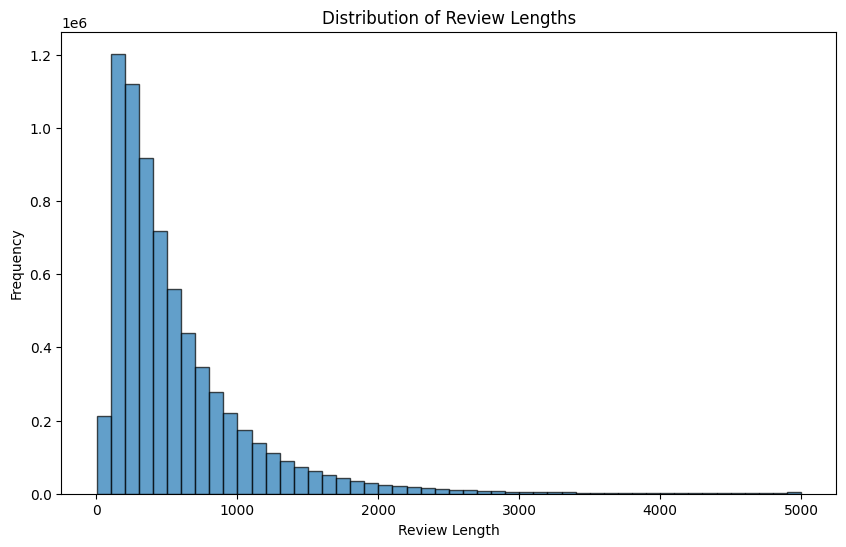

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(review['review_length'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

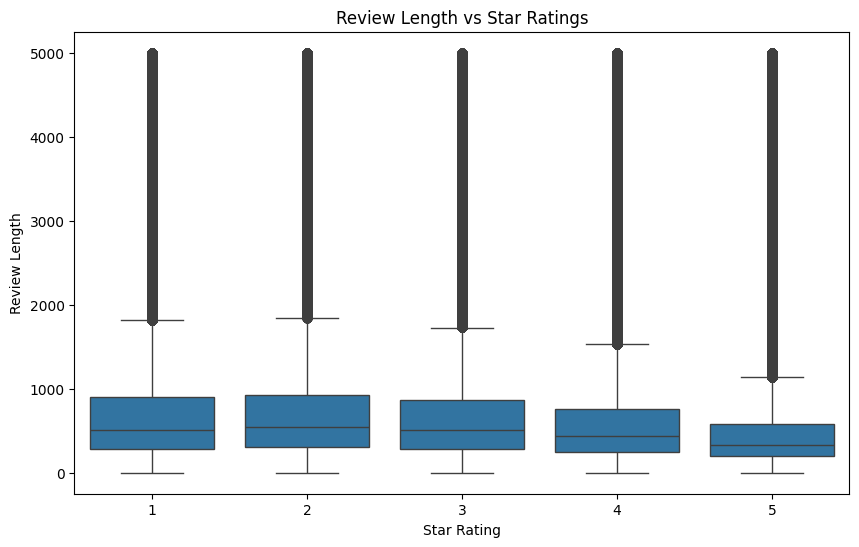

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='review_length', data=review)
plt.title('Review Length vs Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Review Length')
plt.show()

In [16]:
# top 10 users by review counts
top_users = users.sort_values('review_count', ascending=False).head(10)
print("Top 10 Users by Review Count:")
print(top_users[['user_id', 'name', 'review_count', 'average_stars']])

Top 10 Users by Review Count:
                       user_id      name  review_count  average_stars
17169   Hi10sGSZNxQH3NLyWSZ1oA       Fox         17473           3.77
795339  8k3aO-mPeyhbR5HUucA5aA    Victor         16978           3.35
4723    hWDybu_KvYLSdEFzGrniTw     Bruce         16567           3.67
606393  RtGqdDBvvBCjcu5dUqwfzA     Shila         12868           3.87
152     P5bUL3Engv-2z6kKohB6qQ       Kim          9941           3.81
3977    nmdkHL2JKFx55T3nq5VziA    Nijole          8363           3.75
17727   bQCHF5rn5lMI9c5kEwCaNA   Vincent          8354           3.87
7394    8RcEwGrFIgkt9WQ35E6SnQ    George          7738           3.49
10873   Xwnf20FKuikiHcSpcEbpKQ   Kenneth          6766           3.32
1229    CxDOIDnH8gp9KXzpBHJYXw  Jennifer          6679           3.34


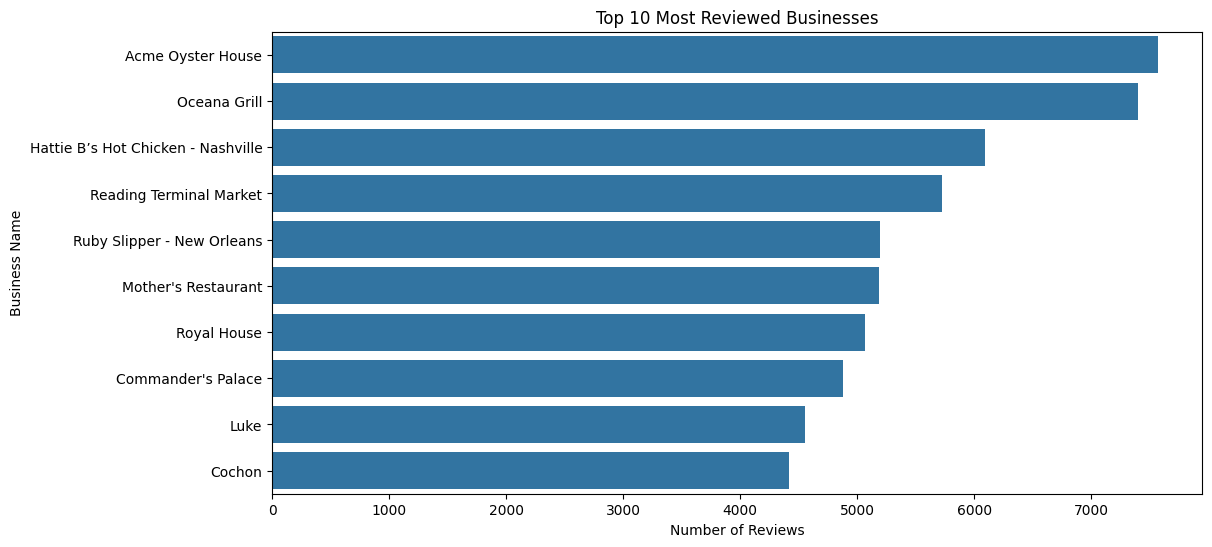

In [17]:
#top 10 businesses by number of review received 
top_businesses = business.sort_values(by='review_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='review_count', y='name', data=top_businesses)
plt.title('Top 10 Most Reviewed Businesses')
plt.xlabel('Number of Reviews')
plt.ylabel('Business Name')
plt.show()

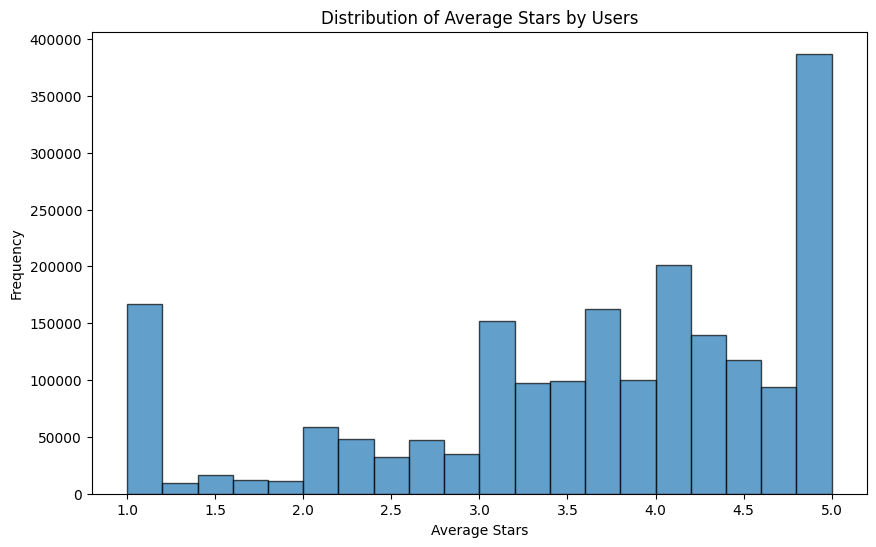

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(users['average_stars'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Stars by Users')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.show()

In [19]:
# merging users and review files on user_id
merged_df = review.merge(users, on='user_id', how='outer')
merged_df.head()

,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,review_length,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,rJ3CASyRfG-7ZviCBFCJQg,---1lKK3aKOuomHnwAkAow,f19eLfhXqR47Ct8Hz2y_pA,5,0,0,0,I hard think luxurious experience begins to de...,2018-12-19 22:26:22,637,...,3.0,2.0,1.0,0.0,5.0,9.0,9.0,9.0,9.0,0.0
1,xJuVVh0wspQlCPgTcbbiIg,---2PmXbF47D870stH1jqA,hKameFsaXh9g8WQbv593UA,5,0,0,0,No matter what night we go....Service and food...,2014-10-28 14:38:58,360,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2,hdtWMFs_rFCD7YLD8L4mNQ,---2PmXbF47D870stH1jqA,hKameFsaXh9g8WQbv593UA,5,0,0,0,This is our regular Wednesday night place to g...,2014-07-10 04:15:23,195,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
3,LBxTq5kq_EeazNCbEz0x5Q,---2PmXbF47D870stH1jqA,KP5OncF2jhT7_J1phHPPww,5,1,0,1,What a wonderful dining experience.... From th...,2015-06-27 23:38:13,833,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
4,--C3ehBCy19vbW6ec-gr7w,---2PmXbF47D870stH1jqA,igC3UWYb9RF5CXOQOVypMw,5,3,2,2,Great lunch today .\nGreeted and Seated immedi...,2013-04-03 19:06:00,411,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0


In [20]:
merged_df.isnull().sum() 

review_id              0
user_id                0
business_id            0
stars                  0
useful_x               0
funny_x                0
cool_x                 0
text                   0
date                   0
review_length          0
name                  33
review_count          33
yelping_since         33
useful_y              33
funny_y               33
cool_y                33
elite                 33
friends               33
fans                  33
average_stars         33
compliment_hot        33
compliment_more       33
compliment_profile    33
compliment_cute       33
compliment_list       33
compliment_note       33
compliment_plain      33
compliment_cool       33
compliment_funny      33
compliment_writer     33
compliment_photos     33
dtype: int64

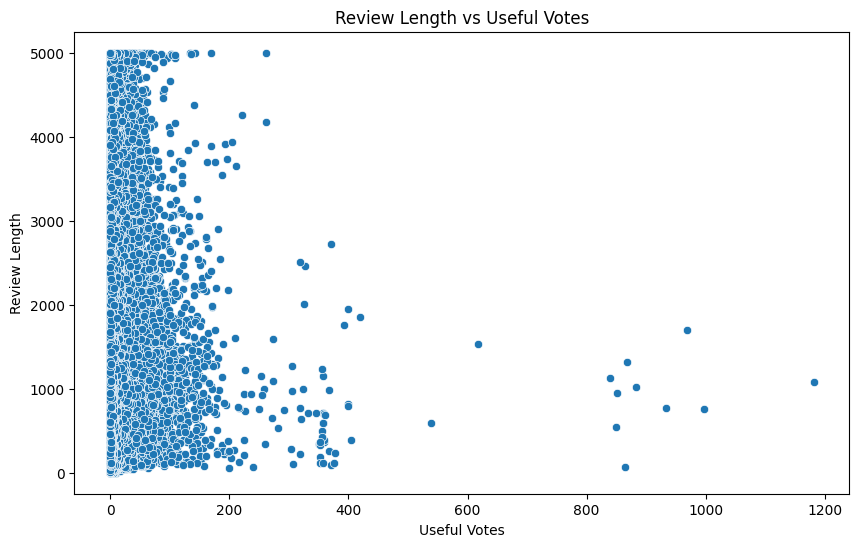

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='useful_x', y='review_length', data=merged_df)
plt.title('Review Length vs Useful Votes')
plt.xlabel('Useful Votes')
plt.ylabel('Review Length')
plt.show()

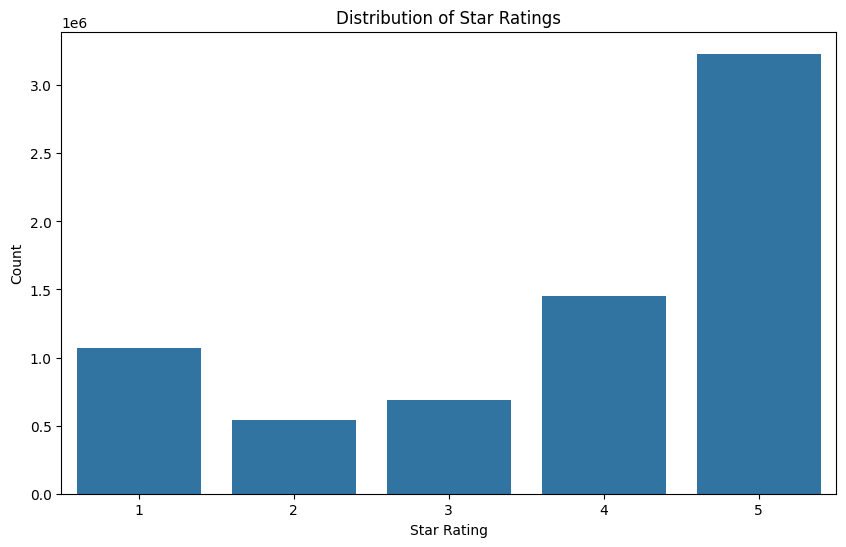

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=review)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

Most users tend to give higher reviews in the 4-5 range

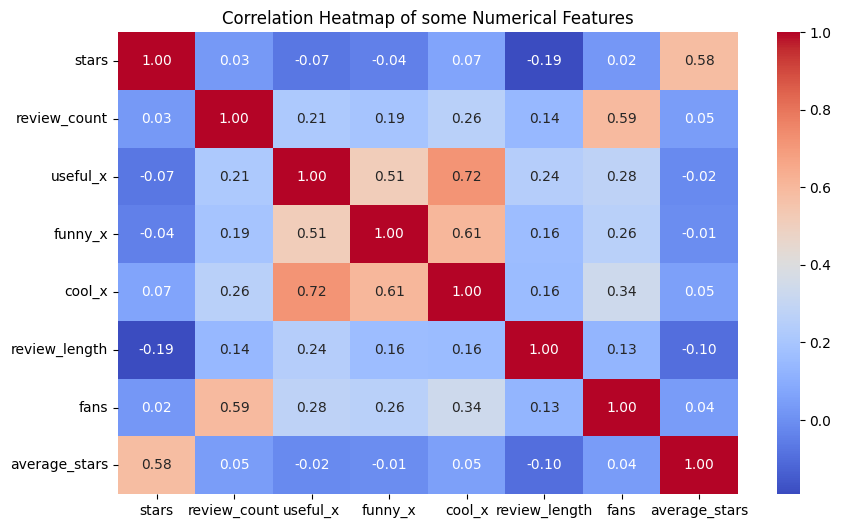

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df[['stars', 'review_count', 'useful_x', 'funny_x', 'cool_x','review_length','fans','average_stars']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of some Numerical Features')
plt.show()

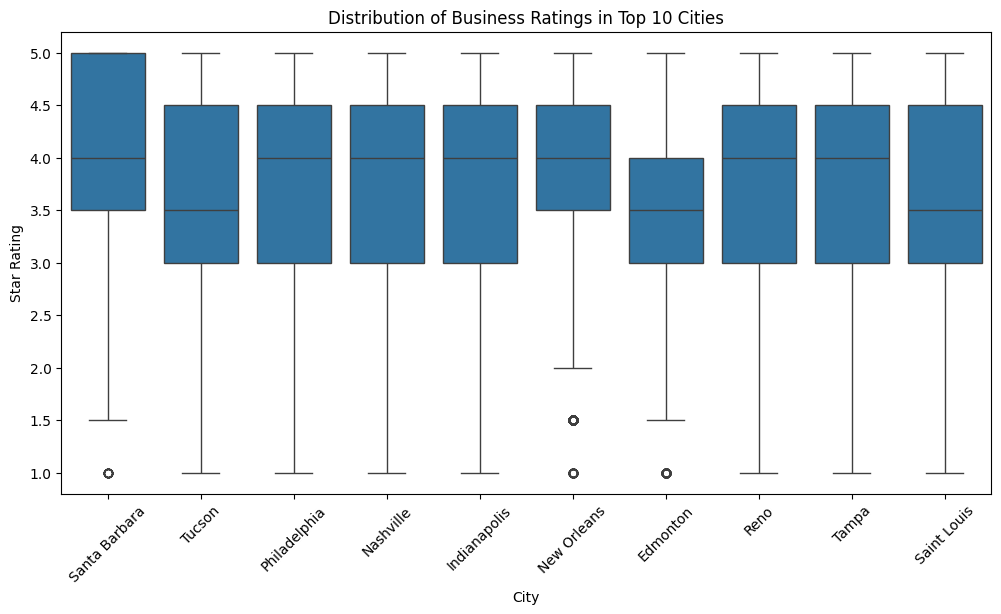

In [24]:
top_cities = business['city'].value_counts().head(10).index  # Top 10 cities
filtered_business = business[business['city'].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='stars', data=filtered_business)
plt.xticks(rotation=45)
plt.title('Distribution of Business Ratings in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Star Rating')
plt.show()

In [25]:
import re
from collections import Counter
import pandas as pd

# Define tokenization function
def tokenize(text):
    """Cleans and tokenizes a given text into words."""
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())  # Ensure text is a string & clean it
    return text.split()

# Initialize word counter
word_counts = Counter()

# Process reviews efficiently row by row
for review_text in review['text'].dropna():
    tokens = tokenize(review_text)
    word_counts.update(tokens)  # Efficiently updates word counts

# Convert most common words into a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

# Display the results
print(common_words_df)

    Word  Frequency
0    the   36711872
1    and   26130927
2      i   18989680
3      a   18805999
4     to   17718274
5    was   13446562
6     of   10407883
7     it    8900572
8    for    8678143
9     is    8664301
10    in    8230859
11    my    7024251
12    we    6317144
13  with    6078629
14  that    6034592
15  they    5911127
16  this    5845216
17   but    5444646
18    on    5132369
19   you    4938345


## Use NLPmethod in Hands-On to identify the Frequency of the words

In [26]:
!pip install nltk

In [27]:
import re
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# download package
nltk.download('stopwords')
nltk.download('punkt')

# upload stopwords and string
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
def tokenize_and_filter(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())  # 只保留字母和空格
    words = word_tokenize(text)  # 进行分词
    words = [word for word in words if word not in stop_words and word not in punctuations]  # 去掉停用词和标点

    # keep nouns and adjectives
    filtered_words = [word for word, tag in pos_tag(words) if tag.startswith('NN') or tag.startswith('JJ')]

    return filtered_words

In [30]:
# sampling reviews
sample_reviews = review['text'].dropna().sample(10000, random_state=42).tolist()
vectorizer = CountVectorizer(stop_words='english')

X_counts = vectorizer.fit_transform(sample_reviews)
words = vectorizer.get_feature_names_out()
word_frequencies = X_counts.toarray().sum(axis=0)

# get the frequency of each words, and sort of
word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_frequencies})
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False).head(20)
print(word_freq_df)

            Word  Frequency
9023        food       5104
9859        good       4586
16785      place       4480
10033      great       4344
19852    service       3353
22653       time       3203
12241       just       3200
13057       like       3017
18013     really       2277
23886         ve       2043
9906         got       1903
2585        best       1744
15097       nice       1709
21218      staff       1661
7096         don       1654
15657    ordered       1617
15656      order       1519
9271    friendly       1493
6699         did       1485
6422   delicious       1459


## Cluster without dimensionality reduction

In [34]:
merged_df_numeric = merged_df.drop(columns=['review_id', 'user_id', 'business_id', 'text', 'name', 
                                         'yelping_since', 'elite', 'friends', 'date'])
merged_df_numeric = merged_df_numeric.fillna(merged_df_numeric.mean())

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
normalized_data = sc.fit_transform(merged_df_numeric)
normalized_data

array([[ 0.84629237, -0.36407309, -0.19337596, ..., -0.06537589,
        -0.01872459, -0.04773058],
       [ 0.84629237, -0.36407309, -0.19337596, ..., -0.09294576,
        -0.08156816, -0.04773058],
       [ 0.84629237, -0.36407309, -0.19337596, ..., -0.09294576,
        -0.08156816, -0.04773058],
       ...,
       [-0.506243  , -0.36407309, -0.19337596, ..., -0.09294576,
        -0.09952346, -0.04773058],
       [-1.85877837, -0.36407309, -0.19337596, ..., -0.09294576,
        -0.09952346, -0.04773058],
       [ 0.84629237, -0.36407309, -0.19337596, ..., -0.09294576,
        -0.09952346, -0.04773058]])

In [37]:
normalized_data[1057, :]

array([ 0.17002469, -0.05673698, -0.19337596, -0.2295175 , -0.18542057,
       -0.20590813, -0.11683861, -0.08562061, -0.10214178, -0.1514171 ,
       -0.34403713, -0.08310633, -0.07525743, -0.03907765, -0.04050607,
       -0.03069784, -0.09405027, -0.07887551, -0.09294576, -0.09294576,
       -0.09952346, -0.04773058])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

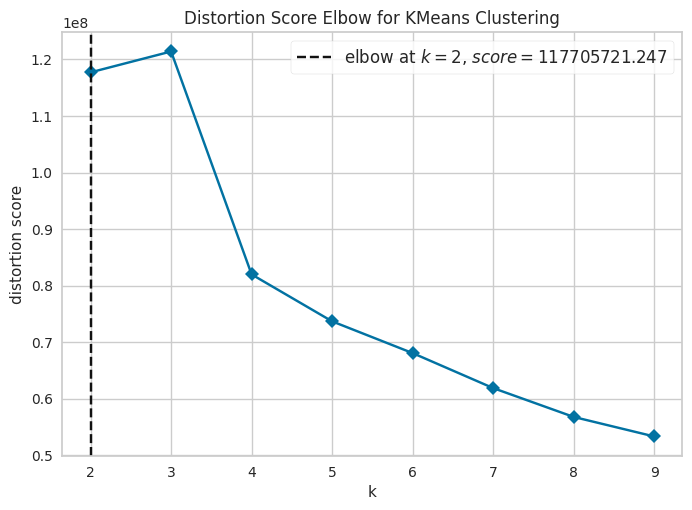

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
## without pca
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(normalized_data)        # Fit the data to the visualizer
visualizer.show()  

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

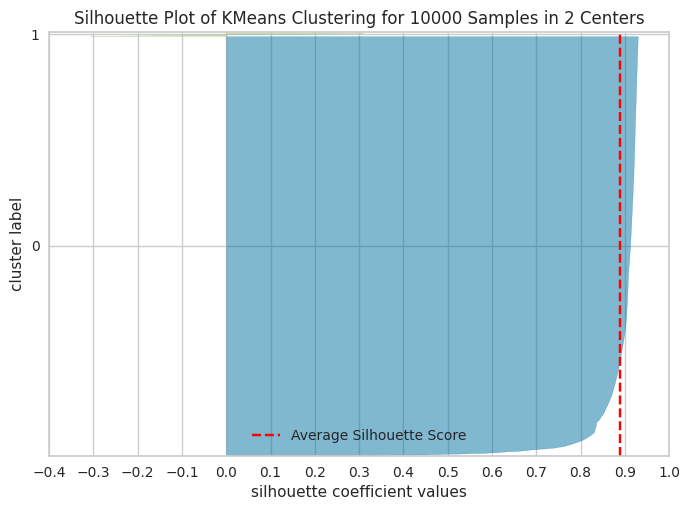

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
# Sampling
sampled_df = transformed_data_df.sample(10000, random_state=42)

kmeans = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(sampled_df)
visualizer.show()

## Dimensionality Reduction

In [46]:
!pip install yellowbrick

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [48]:
# Create the model
model = PCA()
model.fit(normalized_data)

# transform the data
transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(merged_df_numeric.shape[1])]

transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,-0.129593,-0.014263,-0.780880,0.259044,0.379285,0.198450,-0.020998,0.093347,-0.377284,0.310190,...,-0.091535,0.000756,0.034109,0.053297,-0.021559,0.025205,0.018490,0.038176,-0.018361,-8.028463e-17
1,-0.438834,0.271217,-1.212083,1.137668,0.055008,0.169517,-0.175093,0.108300,0.346113,-0.254744,...,0.033218,0.007171,-0.002023,-0.014842,0.000896,-0.017018,0.000167,-0.011236,-0.002238,-3.641987e-17
2,-0.452086,0.301587,-1.312480,1.167696,-0.126280,-0.036317,-0.087569,0.095989,0.363746,-0.298132,...,0.028067,0.007739,0.001664,-0.018297,0.002580,-0.015589,0.000408,-0.010813,-0.002655,-3.641987e-17
3,-0.290241,0.032099,-0.629868,1.309239,0.599693,0.640112,-0.343820,-0.111871,0.271263,-0.135584,...,0.174779,-0.015758,-0.016294,-0.014246,-0.017562,0.004118,0.001808,-0.017396,-0.001450,1.439914e-16
4,-0.015551,-0.279529,-0.014651,2.054011,0.166350,-0.314153,-0.087298,0.395410,0.333179,-0.247318,...,0.043216,-0.055508,-0.029359,-0.033014,-0.026794,0.011396,0.008085,-0.024698,0.002972,-2.445867e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990275,-0.297224,0.079511,1.295593,-1.191444,-0.630744,-0.642499,0.134749,0.280756,0.512058,-0.489612,...,0.283132,-0.074384,-0.013401,-0.029585,-0.011517,0.011176,0.003479,-0.012136,0.001438,1.308411e-17
6990276,-0.310643,0.131349,-0.391584,0.991107,-0.450008,-0.582130,0.054816,0.231532,-0.169222,0.267091,...,0.033719,-0.030922,-0.021490,-0.027341,-0.004729,-0.002374,0.002632,-0.012750,-0.003937,-1.118160e-16
6990277,-0.479557,0.300886,0.449303,-1.009132,-0.320770,-0.052796,-0.064829,0.012467,-0.216485,0.349518,...,0.076355,-0.005249,-0.009507,-0.010106,0.003506,-0.016978,-0.001554,-0.005228,-0.000235,5.471748e-17
6990278,-0.476720,0.265837,2.013013,-2.989700,-0.473948,-0.080930,-0.013370,-0.045166,-0.624985,0.791528,...,0.134675,-0.017452,-0.004369,-0.005583,0.002629,-0.018736,-0.000424,-0.003303,0.005824,1.379842e-16


In [49]:
explained_variance = model.explained_variance_ratio_
print(pd.DataFrame({'PC': [f"PC{i+1}" for i in range(len(explained_variance))], 
                    'Explained Variance Ratio': explained_variance}))

      PC  Explained Variance Ratio
0    PC1                  0.491639
1    PC2                  0.121930
2    PC3                  0.080323
3    PC4                  0.072110
4    PC5                  0.044245
5    PC6                  0.038990
6    PC7                  0.028695
7    PC8                  0.022551
8    PC9                  0.018993
9   PC10                  0.018794
10  PC11                  0.013072
11  PC12                  0.011510
12  PC13                  0.010354
13  PC14                  0.009437
14  PC15                  0.006347
15  PC16                  0.004458
16  PC17                  0.002370
17  PC18                  0.001964
18  PC19                  0.001239
19  PC20                  0.000864
20  PC21                  0.000115
21  PC22                  0.000000


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

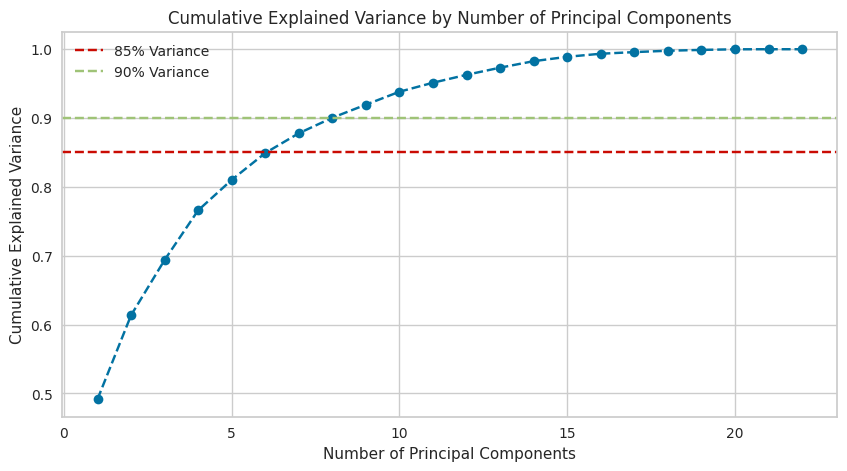

In [50]:
import numpy as np
import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Number of Principal Components")

plt.axhline(y=0.85, color='r', linestyle='--', label="85% Variance")
plt.axhline(y=0.9, color='g', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

In [51]:
pca = PCA(n_components=8)

transformed_data = pca.fit_transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(8)])

print(transformed_data_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.129593 -0.014263 -0.780880  0.259044  0.379285  0.198450 -0.020998   
1 -0.438834  0.271217 -1.212083  1.137668  0.055008  0.169517 -0.175093   
2 -0.452086  0.301587 -1.312480  1.167696 -0.126280 -0.036317 -0.087569   
3 -0.290241  0.032099 -0.629868  1.309239  0.599693  0.640112 -0.343820   
4 -0.015551 -0.279529 -0.014651  2.054011  0.166350 -0.314153 -0.087298   

        PC8  
0  0.093347  
1  0.108300  
2  0.095989  
3 -0.111871  
4  0.395410  


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

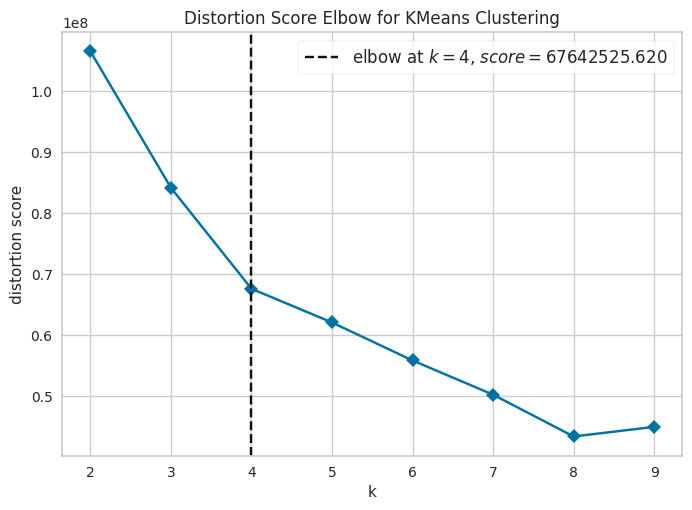

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(transformed_data_df)        # Fit the data to the visualizer
visualizer.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

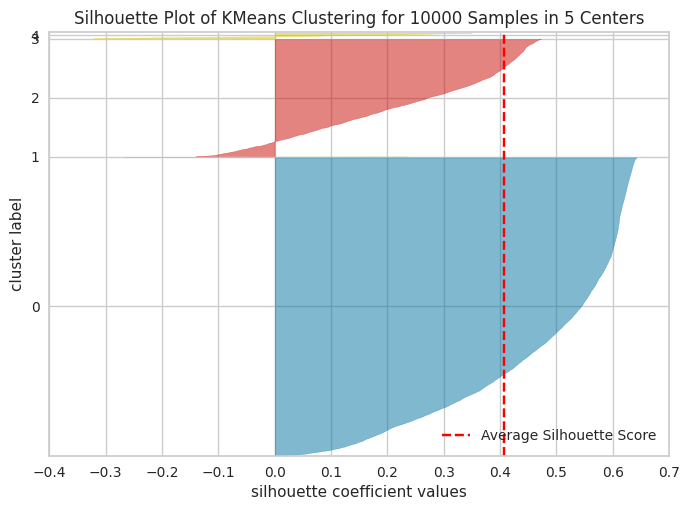

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
# Sampling
sampled_df = transformed_data_df.sample(10000, random_state=42)

kmeans = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(sampled_df)
visualizer.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

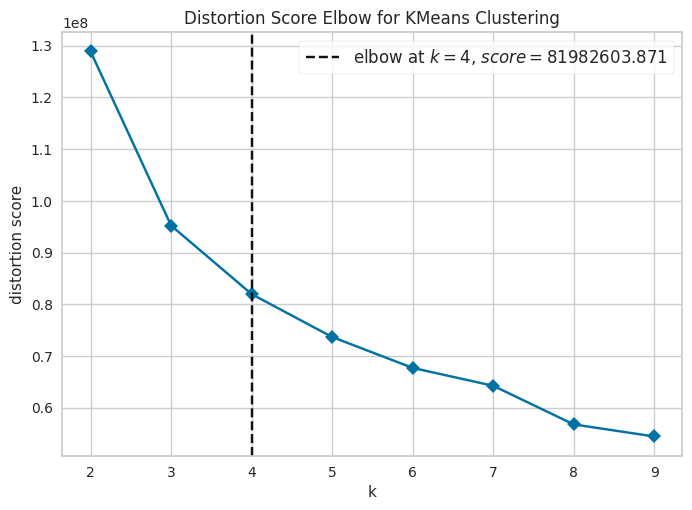

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
## without pca
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(normalized_data)        # Fit the data to the visualizer
visualizer.show()  

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

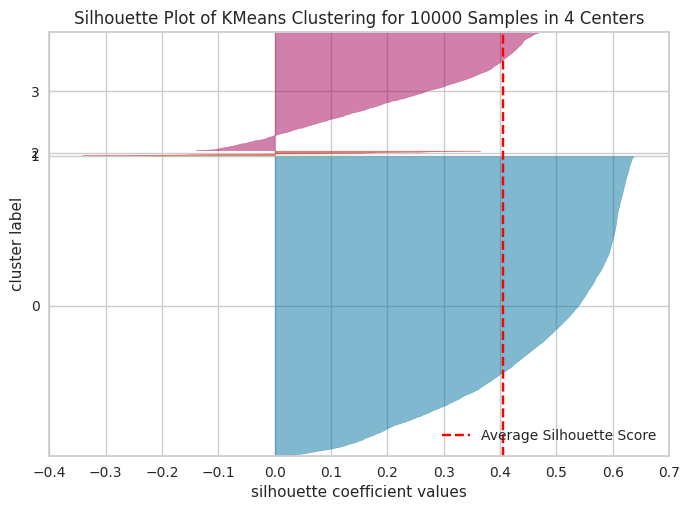

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
sampled_df = transformed_data_df.sample(10000, random_state=42)

kmeans = KMeans(4)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(sampled_df)        # Fit the data to the visualizer
visualizer.show()    

## UMAP

In [57]:
!pip install umap-learn

In [ ]:
import umap
import plotly.express as px

# Use UMAP to reduce the dimensionality of the data
reducer = umap.UMAP(n_components=3) # n_neighbors=15, min_dist=0.1
umap_embeddings = reducer.fit_transform(normalized_data)

# Create a DataFrame for the UMAP embeddings
umap_df = pd.DataFrame(umap_embeddings, columns=["UMAP1", "UMAP2", "UMAP3"]) #

# Add ingredients column to the UMAP DataFrame for hover information
umap_df["ingredients"] = df["ingredients"][valid_indices].values

# Create a 3D scatter plot with hover information
fig = px.scatter_3d(
    umap_df,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    hover_name="ingredients",  # Show ingredients on hover
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize marker size and opacity
fig.update_traces(marker=dict(size=3, opacity=0.7))

# Display the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
